# <center> Atomically thin semiconductors as Non Linear Mirrors</center> 

<center><span style="font-size:1.25em;"> Aakash, Aditya Ranjan, Amal Mathew, Yuktee Gupta </span> </center>
<br><br>
<center><span style="font-size:1.25em;"><b> Abstract </b> </span> </center><center>
In this project we review the paper titled "Atomically thin semiconductors as Non Linear Mirrors" published by Zeytinoglu et. al. in 2017.<br> We will begin with an introduction to the paper and cover some of the background needed to understand it.<br> We will then explain the paper in three parts: <br> (i) Assuming no exciton interactions, <br>(ii) Accounting for inter-excitonic interactions in the mean field limit, <br>(iii) Accounting for quantum fluctuations.<br> We reproduce the plots presented in the paper with the help of the QuTip library in python.<br><br> </center>

## Table of contents
<Br>
<span style="font-size:1.3em;">
1. Introduction and background<br><br>
2. Perfect reflection with no inter-excitonic interactions<br><br>
3. Accounting for inter-excitonic interactions<br><br>
4. Accounting for quantum fluctuations<br><br>
5. Conclusion and Applications<br><br>
6. Acknowledgements<br><br>
7. References<br><br>
8. End Semester Problem
</span>

In [1]:
'''setup the matplotlib graphics library and configure it to show figures inline in the notebook 
as well as other library dependencies '''
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# make qutip available in the rest of the notebook
from qutip import *
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## 1. Introduction and Background
Zeytinoglu et. al. have shown that a transition metal dichalcogenide monolayer with a radiatively broadened exciton resonance would exhibit perfect extinction of a transmitted field. This result holds for s- or
p-polarized weak resonant light fields at any incidence angle, due to the conservation of in-plane momentum of excitons and photons in a flat defect-free two dimensional crystal. 

In contrast to extinction experiments with single quantum emitters, exciton-exciton interactions lead to an enhancement of reflection with increasing power for incident fields that are blue detuned with respect
to the exciton resonance. It is also shown that the interactions limit the maximum reflection that can be
achieved by depleting the incoming coherent state into an outgoing two-mode squeezed state.

Below we have presented results of the same, and simulated the resultant states from the Hamiltonian, along with the reflection coefficient for varying frequencies.

In [2]:
'''Declaring constants'''
# h_bar = 1 (convention)
m = 1                        # Mass of exciton
we = 3.0  * 2 * np.pi        # Frequency (energy) of the exciton in Lab frame
c = 1                        #speed of light set to one for convenience

### 2D Crystal Layer

Monolayers of transition metal dichalcogenides (TMD) such as $MoSe_2$ or $WSe_2$ constitute a new class of two
dimensional (2D) direct band-gap semiconductors.

Lowest energy elementary optical excitations in TMDs in the absence of free electrons or holes are excitons with
an ultra-large binding energy of ∼ 0.5 eV. 

Remarkably, recent experiments have demonstrated predominantly spontaneous-emission limited exciton transition linewidths in clean $MoSe_2$ flakes embedded in hexagonal boron nitride (HBN) layers. 

Since radiative broadening dominates over disorder induced inhomogeneous broadening, TMD monolayers can be considered as ideal two-dimensional (2D) optical materials.

### Band gap 
In semiconductor physics, the band gap of a semiconductor can be of two basic types, a direct band gap or an indirect band gap. The minimal-energy state in the conduction band and the maximal-energy state in the valence band are each characterized by a certain crystal momentum (k-vector) in the Brillouin zone. 

If the k-vectors are different, the material has an "indirect gap". In an "indirect" gap, a photon cannot be emitted because the electron must pass through an intermediate state and transfer momentum to the crystal lattice.

The band gap is called "direct" if the crystal momentum of electrons and holes is the same in both the conduction band and the valence band; an electron can directly emit a photon.

Examples of direct bandgap materials include amorphous silicon and some III-V materials such as InAs, GaAs. Indirect bandgap materials include crystalline silicon and Ge. Some III-V materials are indirect bandgap as well, for example AlSb.

#### Direct Band gap

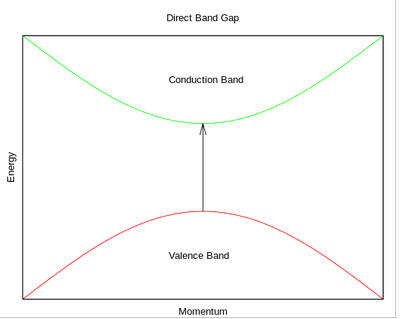
<br>Energy vs. crystal momentum for a semiconductor with a direct band gap, showing that an electron can shift from the highest-energy state in the valence band (red) to the lowest-energy state in the conduction band (green) without a change in crystal momentum. Depicted is a transition in which a photon excites an electron from the valence band to the conduction band.

#### Indirect Band gap

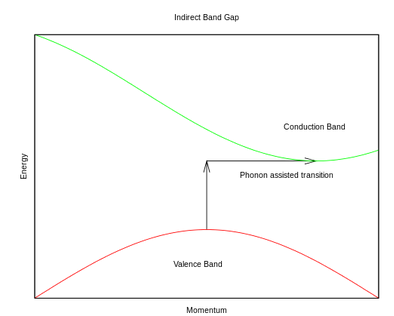

<br>Energy vs. crystal momentum for a semiconductor with an indirect band gap, showing that an electron cannot shift from the highest-energy state in the valence band (red) to the lowest-energy state in the conduction band (green) without a change in momentum. Here, almost all of the energy comes from a photon (vertical arrow), while almost all of the momentum comes from a phonon (horizontal arrow).

### Fock States
In single particle quantum mechanics, the state of a system can be represented by
a ket $|\psi\rangle$ and the space in which these states lie is called the Hilbert space. This Hilbert space contains
states which can accomodate one particle. For more particles we do:
$$
\Rightarrow \mathcal{H}^{N}=\underbrace{\mathcal{H} \otimes \cdots \otimes \mathcal{H}}_{n-\text {copies}}
$$
This method is not suitable for systems where there are multiple particles in different states. So we define fock states as $$
\left|n_{\mathbf{k}_{1}}, n_{\mathbf{k}_{2}}, \ldots n_{\mathbf{k}_{i}} \ldots\right\rangle
$$ In this expression, $n_{\mathbf{k}_{1}}$denotes the number of particles in the i-th state $k_{\mathbf{i}}$, and the particle number operator for the i-th state, $
\widehat{N_{{\mathbf{k}}_{i}}}
$, acts on the Fock state in the following way: $$
\widehat{N_{{\mathbf{k}}_{i}}}\left|n_{\mathbf{k}_{1}}, n_{\mathbf{k}_{2}}, \ldots n_{\mathbf{k}_{i}} \ldots\right\rangle=n_{\mathbf{k}_{i}}\left|n_{\mathbf{k}_{1}}, n_{\mathbf{k}_{2}}, \ldots n_{\mathbf{k}_{i}} \ldots\right\rangle
$$
Hence the Fock state is an eigenstate of the number operator with eigenvalue $n_{\mathbf{k}_{i}}$.

We have non-Hermitian bosonic creation and annihilation operators, denoted by $b^{\dagger}$ and $b$ respectively. The action of these operators on a Fock state for a boson are given by the following two equations:

Creation operator $b_{\mathbf{k}_{l}}^{\dagger}$:
$$
b_{\mathbf{k}_{l}}^{\dagger}\left|n_{\mathbf{k}_{1}}, n_{\mathbf{k}_{2}}, n_{\mathbf{k}_{3}} \ldots n_{\mathbf{k}_{l}}, \ldots\right\rangle=\sqrt{n_{\mathbf{k}_{l}}+1}\left|n_{\mathbf{k}_{1}}, n_{\mathbf{k}_{2}}, n_{\mathbf{k}_{3}} \ldots n_{\mathbf{k}_{l}}+1, \ldots\right\rangle
$$

Annihilation operator $b_{\mathbf{k}_{l}}$:
$$
b_{\mathbf{k}_{l}}\left|n_{\mathbf{k}_{1}}, n_{\mathbf{k}_{2}}, n_{\mathbf{k}_{3}} \ldots n_{\mathbf{k}_{l}}, \ldots\right\rangle=\sqrt{n_{\mathbf{k}_{l}}}\left|n_{\mathbf{k}_{1}}, n_{\mathbf{k}_{2}}, n_{\mathbf{k}_{3}} \ldots n_{\mathbf{k}_{l}}-1, \ldots\right\rangle
$$

The operator follow the commutator properties:
$$
\begin{array}{l}
{\left[b_{i}, b_{j}^{\dagger}\right] \equiv b_{i} b_{j}^{\dagger}-b_{j}^{\dagger} b_{i}=\delta_{i j}} \\
{\left[b_{i}^{\dagger}, b_{j}^{\dagger}\right]=\left[b_{i}, b_{j}\right]=0}
\end{array}
$$

The vacuum state or $|0\rangle$  is the state of lowest energy and the expectation values of  $b$ and  $b^{\dagger}$ vanish in this state:
 
$$
b|0\rangle=0=\langle 0| b^{\dagger}
$$

Also, a general state $
\left|n_{1}, n_{2}, \ldots\right\rangle$ can be written as
$$
\left|n_{1}, n_{2}, \ldots\right\rangle=\frac{\left(b_{1}^{\dagger}\right)^{n_{1}}}{\sqrt{n_{1} !}} \frac{\left(b_{2}^{\dagger}\right)^{n_{1}}}{\sqrt{n_{2} !}} \cdots|0\rangle
$$



In [3]:
'''Declaring size of fock states for photons and excitons'''
Npr = 5             # Number of cavity fock states for right moving modes
Npl = 5             # Number of cavity fock states for left moving modes
Ne = 5              # Number of exciton fock states

### Second Quantized Hamiltonians 
The electromagnetic field is subjected to the methods introduced above. This is done by introducing creation $a_{\mathbf{k} \alpha}$ and annihilation operators $a_{\mathbf{k} \alpha}^{\dagger}$, for both the positive and
negative wave vectors:
$$
\mathbf{A}(\mathbf{r}, t)=\sqrt{\frac{2 \pi c^{2} \hbar}{V}} \sum_{\mathbf{k}} \frac{\hat{\epsilon}_{\mathbf{k} \alpha}}{\sqrt{\omega_{\mathbf{k}}}}\left[a_{\mathbf{k} \alpha} e^{i \mathbf{k} \cdot \mathbf{r}}+a_{\mathbf{k} \alpha}^{\dagger} e^{-i \mathbf{k} \cdot \mathbf{r}}\right]
$$
Then the vector potential determines both the electric and magnetic fields:
$$
\begin{aligned}
\mathbf{E}(\mathbf{r}, t) &=i \sqrt{\frac{2 \pi \hbar}{V}} \sum_{\mathbf{k}} \frac{\omega_{\mathbf{k}} \hat{\epsilon}_{\mathbf{k} \alpha}}{\sqrt{\omega_{\mathbf{k}}}}\left[a_{\mathbf{k} \alpha} e^{i \mathbf{k} \cdot \mathbf{r}}-a_{\mathbf{k} \alpha}^{\dagger} e^{-i \mathbf{k} \cdot \mathbf{r}}\right] \\
\mathbf{B}(\mathbf{r}, t) &=i \sqrt{\frac{2 \pi \hbar}{V}} \sum_{\mathbf{k}} \frac{c \mathbf{k} \times \hat{\epsilon}_{\mathbf{k}} \alpha}{\sqrt{\omega_{\mathbf{k}}}}\left[a_{\mathbf{k} \alpha} e^{i \mathbf{k} \cdot \mathbf{r}}-a_{\mathbf{k} \alpha}^{\dagger} e^{-i \mathbf{k} \cdot \mathbf{r}}\right]
\end{aligned}
$$

So the total field Hamiltonian is the sum over all wave vectors, and the positive and negative terms give the same total

$$H=\sum_{\mathbf{k} \alpha} \hbar \omega_{\mathbf{k}}\left(a_{\mathbf{k} \alpha}^{\dagger} a_{\mathbf{k} \alpha}+\frac{1}{2}\right)=\sum_{\mathbf{k} \alpha}\left(n_{\mathbf{k} \alpha}+\frac{1}{2}\right)$$

where $n_{\mathbf{k} \alpha}=a_{\mathbf{k} \alpha}^{\dagger}a_{\mathbf{k} \alpha}$ is the number operator.

The effective Hamiltonian for the particle or charge as it interacts with the field is given by
$$H=\frac{1}{2 m}\left(\mathbf{p}-\frac{q}{c} \mathbf{A}\right)^{2}+V(\mathbf{r})+q A_{0}$$

Including the hamiltonian of the field:
$$
H=\frac{\mathbf{p}^{2}}{2 m}+V(\mathbf{r})-\frac{q}{2 m c}(\mathbf{A} \cdot \mathbf{p}+\mathbf{p} \cdot \mathbf{A})+\frac{q^{2} \mathbf{A}^{2}}{2 m c^{2}}+q A_{0}+H_{\mathrm{photons}}
$$

Using radiation gauge $\nabla \cdot \mathbf{A}=\mathbf{0}$ and $A_{0}=0$ we see that:
$$
\mathbf{p} \cdot \mathbf{A}=\mathbf{A} \cdot \mathbf{p}
$$
Thus the interaction terms are given by which is approximated by a single term:
$$
H_{int}=-\frac{q}{m c} \mathbf{A} \cdot \mathbf{p}+\frac{q^{2} \mathbf{A}^{2}}{2 m c^{2}} \approx-\frac{q}{m c} \mathbf{A} \cdot\mathbf{p}
$$




In [4]:
r  = tensor(destroy(Npr), qeye(Ne), qeye(Npl))       # Ladder operator of Right propagating field
l  = tensor(qeye(Npr), qeye(Ne), destroy(Npl))       # Ladder operator of Left propagating field

Any subsequent Hamiltonians can now be written in terms of the creation and anihilation operators, as we present below.

### Excitons
An exciton is a bound state of an electron and an electron hole which are attracted to each other by the electrostatic Coulomb force. It is an electrically neutral quasiparticle that exists in insulators, semiconductors and some liquids. The exciton is regarded as an elementary excitation of condensed matter that can transport energy without transporting net electric charge<center>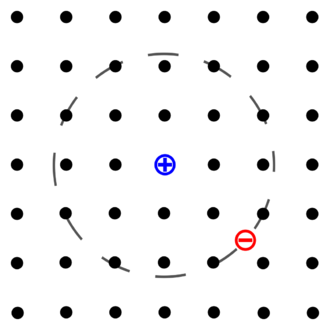</center>

Excitons act as bosons so the methods introduced above are applicable. The exciton we have considered here only has one state possible in lab frame i.e the exciton has fixed energy = $\hbar w_{exc}$

## Hamiltonian

We assume a defect-free flat TMD monolayer and a large excitation spot such that in-plane momentum k is conserved.

For simplification $\hbar$ is taken to be 1.

The Hamiltonian for such a system can be split into three parts:<br>

$$ H = \sum_{k} H_{bath}(k) + H_{int}(k)+H_{TMD}(k) $$
<br>
$$ H_{bath}(k) = \int_{-\infty}^{\infty} d\omega \ \omega \ [r^{\dagger}_{k}(\omega)r_{k}(\omega)+ l^{\dagger}_{k}(\omega)l_{k}(\omega)]  $$
<br><br>
$$ H_{int}(k) = \int_{-\infty}^{\infty} d\omega \ \kappa e^{i\theta/2} \ x^{\dagger}_{k}(\omega)[r_{k}(\omega)+ l_{k}(\omega)] + h.c.  $$
<br>
<br>Here,<br>
$ H_{bath} $ captures all the photons in the bath. Their eigenvalues are $\omega$ (as $\hbar$ = 1). <br>
$H_{int}$ accounts for the interactions between the bath and the TMD layer.
<br> 

$\kappa$ and $\theta$/2 are the photon-exciton coupling strength and the coupling phase respectively.<br>

Note that only photons and excitons of the same k mode couple with each other because of in-plane momentum conservation.<br>

## 2. Perfect reflection with no inter-excitonic interactions

The Hamiltonian for the TMD, where there are no inter-excitonic interactions are considered:

$$ H_{TMD}(k) = \omega_{exc}(k)x^{\dagger}_{k}x_{k} $$
<br>
where : <br  />

**k** is the *in-plane momentum* of the bosons (excitons, photons) which is conserved due to a large excitation spot of the TMD layer by the laser leading to translational symmetry in the plane .<br>

$r_{k}(\omega)$ is the *annihilation operator* for a photon of frequency $\omega$ and in-plane momentum k in the right propagating field.
Similarly for the left propagating field.<br>
$x_{k}(\omega)$ is the *excitonic annihilation operator* of the excitons in the TMD layer at a frequency $\omega$ and in-plane momentum k.<br>

$H_{TMD}$ describes the mechanics of the TMD layer. In this system, we will assume no inter-excitonic interactions.<br>


*To Note* <br> 
To simplify the expressions, we have set $\hbar$ = 1 and expressed frequencies in
a frame rotating with the incident coherent field frequency $\omega_p$
<br>
<br> Subsequently, we've shown simulations for a *single k* (k=0) so as to decrease computational complexity, this is equivalent to only considering the excitons in mode k=0.

In [5]:
k=0                              #normally incident light            
def w_ex(wp):
  return (we + (k ** 2)/m - wp)  # Frequency (energy) of the exciton in the Rotating frame

Here one must note the $r$ and $l$ operators create states in the momentum basis, and have to be normalised to be used in frequency basis. $\kappa$ also needs to be normalised.
$$r_k(w) = \sqrt{\rho_{env}(k,\omega)} r_k(k_z)$$
$$\kappa(\omega) = \sqrt{\rho_{env}(k,\omega)}\kappa(k_z)$$
Where $k_z$ is the photon momenta, and $\rho$ is the density of states which depends on k, and the pump frequency.
$$\rho_{env}(k,\omega) = \frac{1}{c}\frac{\omega +\omega_p}{\sqrt{(\omega +\omega_p)^2 - (ck)^2}}$$

We now need to solve for $x_{k}$ to understand the dynamics of the system<br>
This is done by solving the Heisenberg-Langevin equation which is an operator evolution equation for open quantum systems:

$$\begin{aligned}
\dot{x}_{k}(t) &=\frac{i}{\hbar}[H_{}, x_{k}(t)]
\end{aligned}$$

$$\begin{aligned}
\dot{x}_{k}(t) &=\frac{i}{\hbar}[H_{TMD}, x_{k}(t)]+\frac{i}{\hbar}[H_{bath}, x_{k}(t)]+\frac{i}{\hbar}[H_{int}, x_{k}(t)]
\end{aligned}$$

And the commutator,
$$\begin{aligned}
\ [H_{bath}, x_{k}(t)]=0
\end{aligned}$$
as the operators in both sides act on different Hilbert Spaces 

$$\begin{aligned}
\dot{x}_{k}(t) &=\frac{i}{\hbar}[H_{TMD}, x_{k}(t)]
-\left\{i e^{-i \theta} \sqrt{\gamma}\left[r_{k}^{\mathrm{in}}(t)+l_{k}^{\mathrm{in}}(t)\right]+\frac{2 \gamma}{2} x_{k}(t)\right\}
\end{aligned}$$
<br><br>
where $\gamma= 2\pi\kappa^{2}$ is a measure of the strength of radiative decay of the TMD excitons into the right and left moving modes.
<br>

The $r^{in}_{k}$ and  $l^{in}_{k}$ defined in the above equation refer to the right(left) moving input modes and are defined as follows:<br><Br>
$$r_{k}^{\mathrm{in}}(t)=\int_{-\infty}^{\infty} e^{-i \omega\left(t-t_{0}\right)} r_{k}(\omega) d \omega$$<br><Br>
Now, the output modes are defined by the following input-output relation<br><br>
$$r_{k}^{\text {out }}(\omega)=r_{k}^{\text {in }}(\omega)-i e^{i \theta} \sqrt{\gamma} x_{k}(\omega)$$

${x}_{k}(t)$ can be defined similarly to $r^{in}_{k}(t)$, we have:
$${x}_{k}(t) = \int_{-\infty}^{\infty} e^{-i \omega\left(t-t_{0}\right)} x_{k}(\omega) d \omega$$<br>
Taking the derivative w.t to t on both sides we get,
$$\dot{x}_{k}(t) = -i\int_{-\infty}^{\infty} \omega e^{-i \omega\left(t-t_{0}\right)} x_{k}(\omega) d \omega$$<br>
Substituting back into the Heisenberg-Langevin equation, for $ H_{TMD}(k) = -i\omega_{exc}(k)x^{\dagger}_{k}x_{k} $, we have:
<br>
$$ -i\omega  x_{k}(\omega) = i[\omega_{exc}(k)x^{\dagger}_{k}x_{k},x_{k}] -\left\{i e^{-i \theta} \sqrt{\gamma}\left[r_{k}^{\mathrm{in}}(\omega)+l_{k}^{\mathrm{in}}(\omega)\right]+\frac{2 \gamma}{2} x_{k}(\omega)\right\}$$
<br><br>
Using the bosonic operator commutation relation,
$$-i\omega  x_{k}(\omega) = -i\omega_{exc}(k)x_{k} -\left\{i e^{-i \theta} \sqrt{\gamma}\left[r_{k}^{\mathrm{in}}(\omega)+l_{k}^{\mathrm{in}}(\omega)\right]+\frac{2 \gamma}{2} x_{k}(\omega)\right\}$$<br><br>
Rearranging and simplifying, we get
$$x_k(w) = -i(e^{-i\theta}\sqrt{\gamma}) G_0(\omega,k) [r_k^{in}(w)+l_k^{in}(w)]$$<br>
where :         $ G_0(\omega,k) = \frac{1}{\gamma - i(\omega - \omega_{exc}(k))}$
<br>

This allows us to define $r_k^{out}$ in terms of the $r_k^{in}$ and $l_k^{in}$  operator.
$$r_{k}^{\text {out }}(\omega)=[1-\gamma G_0(\omega,k)] r_{k}^{in}(w) -\gamma G_0(\omega,k) l_{k}^{in}(w) $$

Now, we can define the Hamiltonian of the system, and all the relevant operators as follows in code. The output of the function are respective operators for each $\omega$.

In [6]:
# Net Hamiltonian

def Hamiltonian(wp, K, theta):

    w = 0
    
    # Rotating frame normalization
    rho = ((wp + w)/c)/np.sqrt((wp + w)**2 - (c*k)**2)                    # Normalization factor
    
    K = np.sqrt(rho) * K                                        # Rotating frame normalization
    
    # Radiative decay of excitons into right(left) moving modes
    gamma = 2 * np.pi * (K ** 2)
    
    # Free propagator
    G = 1/(gamma - 1j*(w - w_ex(wp)))
    
    # Normalizing Right (Left) ladder operator
    r_in = np.sqrt(rho) * r
    l_in = np.sqrt(rho) * l
    
    # Output operators for Right (Left) Propagating field
    r_out = (1 - gamma * G) * r_in - gamma * G * l_in
    l_out = (1 - gamma * G) * l_in - gamma * G * r_in

    # Exciton ladder operator
    x = -1j * np.exp(-1j*theta) * np.sqrt(gamma) * G * (r_in + l_in)

    # Number operators
    ne = x.dag() * x              # Exciton number operator

    nr_in = r_in.dag() * r_in     # Right--in number operator
    nr_out = r_out.dag() * r_out  # Right--out number operator

    nl_in = l_in.dag() * l_in     # Left--in number operator
    nl_out = l_out.dag() * l_out  # Left--out number operator
    
    # Non-interacting exciton system
    H_tmd = w_ex(wp) * x.dag() * x

    # Photon-Exciton Interaction
    H_int = K * np.exp(1j*theta/2) * x.dag() * ((r_in + l_in + r_out + l_out) + (r_in + l_in + r_out + l_out).dag())

    # Noise Hamiltonian
    H_bath = w * (r_in.dag() * r_in + l_in.dag() * l_in + r_out.dag() * r_out + l_out.dag() * l_out)
    
    H = H_tmd + H_int + H_bath
    
    return ne, nr_in, nr_out, nl_in, nl_out, r_in, r_out, l_in, l_out, H

At resonance, for $\omega_p = \omega_{exc}(k)$ we see $G_0(\omega,k) = \gamma^{-1}$.
<br>
 Below, we've calculated the reflection coefficient for various $\omega$ and created a plot to show resonance, after finding he expectation value of all the operators on interacting with a coherent monochromatic EM incident field (right).

In [7]:
# Coherent Monochromatic Incident EM field
psi = tensor(coherent(N=5, alpha=1.0),fock(5, 0), fock(5, 0)) 

wp_vec = np.linspace(0, 6, 1001) * 2 * np.pi   # Frequency vector

K = 0.25                                       # Coupling strength
theta = np.pi/2                                # Coupling phase 

ne_expt = []
nri_expt = []
nro_expt = []
nlo_expt = []

ri_expt = []
ro_expt = []
li_expt = []
lo_expt = []

for wp in wp_vec:
    
    ne, nr_in, nr_out, nl_in, nl_out, r_in, r_out, l_in, l_out, H = Hamiltonian(wp, K, theta)
    
    e = expect(ne, psi)
    ne_expt.append(e)
    
    nri = expect(nr_in, psi)      # Right-in photon occupation probability
    nri_expt.append(nri)
    
    nro = expect(nr_out, psi)     # Right-out photon occupation probability
    nro_expt.append(nro)          

    nlo = expect(nl_out, psi)     # Left-out photon occupation probability
    nlo_expt.append(nlo)          
    
    lie = expect(l_in, psi)       # Left-in photon expectation value
    li_expt.append(lie)
    
    loe = expect(l_out, psi)      # Left-out photon expectation value
    lo_expt.append(loe)
    
    roe = expect(r_out, psi)      # Right-out photon expectation value
    ro_expt.append(roe)
    
    rie = expect(r_in, psi)       # Right-in photon expectation value
    ri_expt.append(rie)

/home/aakash/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


In [8]:
#Reflection Coefficient 
# RC = gamma * G(w,k)  (k=0 here)
# Can be calculated by taking expectation value of Eq(8)

rc = (np.array(ri_expt) - np.array(ro_expt))/(np.array(ri_expt) + np.array(li_expt))

/home/aakash/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1, ' Reflection Coefficient w.r.t wp')

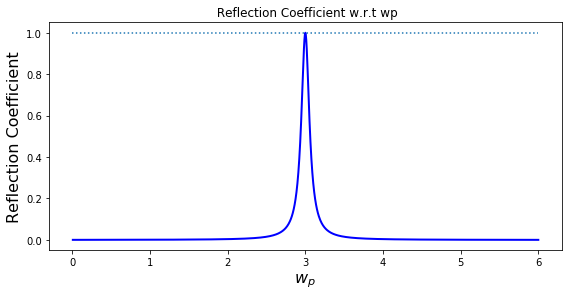

In [9]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(8,4))

axes.plot(wp_vec/(2*np.pi), rc, 'b', linewidth=2)
axes.plot(wp_vec/(2*np.pi), np.ones(len(wp_vec)), ':')
axes.set_ylabel("Reflection Coefficient", fontsize=16)
axes.set_xlabel('$w_{p}$', fontsize=16)

fig.tight_layout()
axes.set_title(" Reflection Coefficient w.r.t wp")

It is clearly visible, that at resonance, perfect reflection of the incoming EM wave is acheived. 
Now, we expand our model to account for the inter-excitonic interactions in the TMD layer and polarization of the incident light. 

## 3. Accounting for inter-excitonic interactions
When the input coherent field is incident on the TMD layer at an angle $\theta\neq 0$ the polarization of the incoming
light becomes important. The coupling constant for the p polarised light is smaller than the s polarised by a factor of $cos^2 (\theta_{inc})$.

This extra input-output relation can also be written as :
$$r_{k,\epsilon}^{\text {out }}(\omega)=[1-\gamma_{\epsilon} G_0(\omega,k)] r_{k,\epsilon}^{in}(w)$$
by using an additional polarization label ${\epsilon}$ = s, p describing polarization of the incoming light.

The excitonic excitations that couple to the s and p polarised waves respectively are spectrally different, but this can be accounted for by the exciton-exciton interactions, leading to different dispersion for each types of light. Each individually, would be perfectly reflected at resonance, but the reflectivity falls below unity for any $\omega_p$ with an superposition of s and p polarised light. 
<br> 
Now the new Hamiltonian for the TMD is given by:
$$H_{TMD}^{int} = [\sum_{k} \omega_{exc}(k) x_k^{\dagger}x_k ] + \frac{g}{2}x_0^{\dagger}x_0^{\dagger}x_0x_0 +\frac{g}{2}\sum_k^{'} (x_k^{\dagger}x_{-k}^{\dagger}x_0x_0 + x_0^{\dagger}x_0^{\dagger}x_kx_{-k} + 4x_0^{\dagger}x_0x_k^{\dagger}x_k) $$ 

Where g > 0 and represents repulsive contact interactions and $\sum_k^{'}$ excludes k=0

Subsequently examining this system for a normally incident field on the TMD, ie k=0 and solving the Heisenberg-Langevin equation and substituting in the mean field limit (k = 0, $\omega=0$), and following the same steps as in the previous case,we get: 
$$-i\omega  x_{0}(\omega) = -i\omega_{exc}(0)x_{0} -igx_0^{\dagger}x_0x_0 -\left\{i e^{-i \theta} \sqrt{\gamma}\left[r_{0}^{\mathrm{in}}(\omega)+l_{0}^{\mathrm{in}}(\omega)\right]+\frac{2 \gamma}{2} x_{0}(\omega)\right\}$$
<br>
Now, we will take the incident coherent field to have expectation value of the form,   $$<r_{k=0}^{in}(w=0)> = \beta\sqrt{\gamma}$$<br>

substituting in the mean field, we get:
    $$<x_0> = -i(e^{-i\theta}\gamma\beta)\bar{G}(0,0)$$
    <br></br>
Where $\bar{G}(w,k) = \frac{1}{\gamma-i(\omega - \bar{\omega}(k))}$   <br>
$\bar{\omega}(k)= \omega_{exc}(k) + (2-\delta_{k,0})g|{\psi_0}|^2 $   <br>
$|{\psi_0}|^2 = <x_0^{\dagger}x_0> $  which is the number of excitons for the mode of k=0, $\omega$=0   <br>

This follows the self consistency eqn:
$$ |{\psi_0}|^2 = \gamma^2 |\bar{G}_0|^2 |\beta|^2 = \frac{\gamma^2}{\gamma^2 + \bar{\omega}_0^2}|\beta|^2$$
which comes out be an equation of order 3 in $|\psi_0|^2$

In [10]:
#Finding the roots of psi_not_squared, since its a bistable solution, we consider the maxima and minima roots

def exc_rho1(g, w_ex, gamma, beta):
    roots = np.roots([g**2, 2*g*(w_ex), (gamma**2 + (w_ex)**2), -1*(gamma**2)*(np.abs(beta)**2)])
    ne = roots[(roots - np.conj(roots))/(2*1j) == 0]                 #only considering real values of psi_square
    ne = np.max(ne)  
    return ne

def exc_rho2(g, w_ex, gamma, beta):
    
    roots = np.roots([g**2, 2*g*(w_ex), (gamma**2 + (w_ex)**2), -1*(gamma**2)*(np.abs(beta)**2)])
    ne = roots[(roots - np.conj(roots))/(2*1j) == 0]                #only considering real values of psi_square             
    ne = np.min(ne)
    return ne

In [11]:
wp_vec = np.linspace(1,6,100) * 2 * np.pi
  
g = 1                                     #repulsive contact interactions constant
beta = np.sqrt(3.5/g)                     # Amplitude of incident light with 0 inplane momenta
theta = np.pi/2                           #coupling phase * 2

# Incident field properties
w = 0.0  * 2 * np.pi                       # Frequency (energy) of the incident field in rotating feild fram

ri_expt = []                               #array of right incoming field expeactation values

ne_expt1 = []                              #Expectation values of n, excitons, and right outgoing field for root1
xe_expt1 = []
ro_expt1 = []

ne_expt2 = []                              #Expectation values of n, excitons, and right outgoing field for root1
xe_expt2 = []
ro_expt2 = []

for wp in wp_vec:

    w_ex = we - wp
    
    # Rotating frame normalization
    rho = ((w+wp)/c)/np.sqrt((w + wp)**2 - (c*k)**2) # Normalization factor
    
    K = 0.25 * rho                                   #coupling factor
     
    # Radiative decay of excitons into right(left) moving modes
    gamma = 2 * np.pi * (K ** 2)

    #for root1
    ne1 = exc_rho1(g, w_ex, gamma, beta)
    G01 = 1/(gamma - 1j*(w - (w_ex + g * ne1)))
    xe1 = -1j * np.exp(-1j * theta) * gamma * beta * G01                         #expectation value of x_not
    r_out1 = beta * np.sqrt(gamma) -1j * np.exp(1j*theta) * np.sqrt(gamma) * xe1 #expressing rout in terms of xk
    ne_expt1.append(ne1)
    xe_expt1.append(xe1)
    ro_expt1.append(r_out1)
    
    #for root2
    ne2 = exc_rho2(g, w_ex, gamma, beta)
    G02 = 1/(gamma - 1j*(w - (w_ex + g * ne2)))
    xe2 = -1j * np.exp(-1j * theta) * gamma * beta * G02
    r_out2 = beta * np.sqrt(gamma) -1j * np.exp(1j*theta) * np.sqrt(gamma) * xe2
    ne_expt2.append(ne2)
    xe_expt2.append(xe2)
    ro_expt2.append(r_out2)
    
    
    ri_expt.append(beta * np.sqrt(gamma))


rc1 = np.abs((np.array(ri_expt) - np.array(ro_expt1))/np.array(ri_expt))**2      
rc2 = np.abs((np.array(ri_expt) - np.array(ro_expt2))/np.array(ri_expt))**2

Text(0.5, 1, 'Reflectivity w.r.t wp')

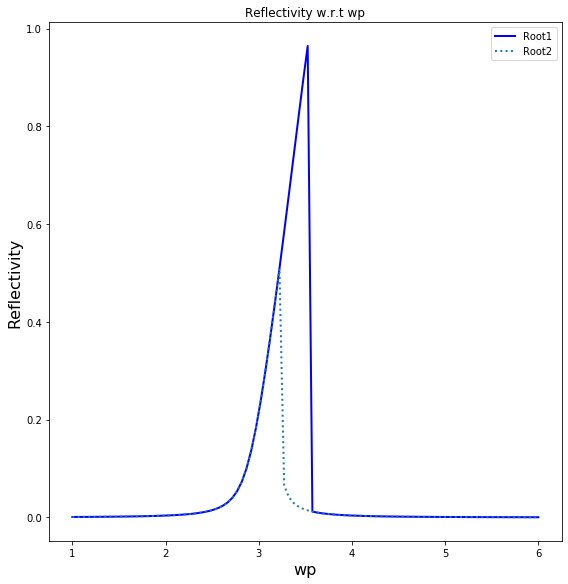

In [12]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(8,8))

axes.plot(wp_vec/(2*np.pi), rc1, 'b', linewidth=2, label="Root1")
axes.plot(wp_vec/(2*np.pi), rc2, ':', linewidth=2, label="Root2")
axes.set_ylabel("Reflectivity", fontsize=16)
axes.set_xlabel("wp", fontsize=16)
axes.legend(loc=0)

fig.tight_layout()
axes.set_title("Reflectivity w.r.t wp")

In [13]:
wp_vec = np.linspace(1,6,100) * 2 * np.pi
  
g = -1                                    # Attractive contact interactions constant
beta = np.sqrt(-3.5/g)                    # Amplitude of incident light with 0 inplane momenta
theta = np.pi/2                           # coupling phase * 2

# Incident field properties
w = 0.0  * 2 * np.pi                       # Frequency (energy) of the incident field in rotating field frame

ri_expt = []                               # array of right incoming field expeactation values

ne_expt1 = []                              # Expectation values of n, excitons, and right outgoing field for root1
xe_expt1 = []
ro_expt1 = []

ne_expt2 = []                              # Expectation values of n, excitons, and right outgoing field for root1
xe_expt2 = []
ro_expt2 = []

for wp in wp_vec:

    w_ex = we - wp
    
    # Rotating frame normalization
    rho = ((w+wp)/c)/np.sqrt((w + wp)**2 - (c*k)**2) # Normalization factor
    
    K = 0.25 * rho                                   #coupling factor
     
    # Radiative decay of excitons into right(left) moving modes
    gamma = 2 * np.pi * (K ** 2)

    #for root1
    ne1 = exc_rho1(g, w_ex, gamma, beta)
    G01 = 1/(gamma - 1j*(w - (w_ex + g * ne1)))
    xe1 = -1j * np.exp(-1j * theta) * gamma * beta * G01                         #expectation value of x_not
    r_out1 = beta * np.sqrt(gamma) -1j * np.exp(1j*theta) * np.sqrt(gamma) * xe1 #expressing rout in terms of xk
    ne_expt1.append(ne1)
    xe_expt1.append(xe1)
    ro_expt1.append(r_out1)
    
    #for root2
    ne2 = exc_rho2(g, w_ex, gamma, beta)
    G02 = 1/(gamma - 1j*(w - (w_ex + g * ne2)))
    xe2 = -1j * np.exp(-1j * theta) * gamma * beta * G02
    r_out2 = beta * np.sqrt(gamma) -1j * np.exp(1j*theta) * np.sqrt(gamma) * xe2
    ne_expt2.append(ne2)
    xe_expt2.append(xe2)
    ro_expt2.append(r_out2)
    
    
    ri_expt.append(beta * np.sqrt(gamma))


rc1 = np.abs((np.array(ri_expt) - np.array(ro_expt1))/np.array(ri_expt))**2      
rc2 = np.abs((np.array(ri_expt) - np.array(ro_expt2))/np.array(ri_expt))**2

Text(0.5, 1, 'Reflectivity w.r.t wp')

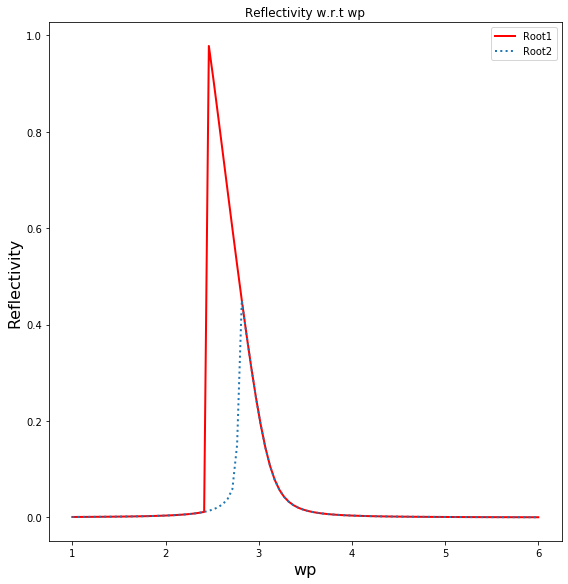

In [14]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(8,8))

axes.plot(wp_vec/(2*np.pi), rc1, 'r', linewidth=2, label="Root1")
axes.plot(wp_vec/(2*np.pi), rc2, ':', linewidth=2, label="Root2")
axes.set_ylabel("Reflectivity", fontsize=16)
axes.set_xlabel("wp", fontsize=16)
axes.legend(loc=0)

fig.tight_layout()
axes.set_title("Reflectivity w.r.t wp")

As can be seen from the above plots the incident coherent wave has to be:

Blue detuned for g > 0 (Replusive exciton-exciton interactions case)

Red detuned for g < 0  (Attractive exciton-exciton interactions case)

This entails that at perfect extinction, the exciton flux is equal to the photon influx:
$$\gamma|\tilde{\psi_0}|^2 = \gamma|\beta|^2 = \gamma\frac{\omega_p - \omega_{exc}(k=0)}{g}$$
where $|\tilde{\psi_0}|^2$ is the density of excitons at perfect extinction.
<br> Note here , on setting g = 0 no detuning of the input field is required, similar to our original case of resonance at the exciton resonance frequency. <br>
To obtain solutions for subsequent coherent excitonic fields, the equations are solved for the perturbations up-to a linear order.<br>

Subsequently we've solved for $x_0$ and other operators assuming s-polarised light (a single parabolic dispersion).

## 4. Accounting for quantum fluctuations

For k $\neq$ 0 we have:
$$x_k(\omega) = -i(e^{-i\theta}\sqrt{\gamma})G(\omega,k)\times ( n_k^{in}(\omega) + U[\bar{G}(-\omega,-k)]*(n_{-k}^{in})^{\dagger}(-\omega)) $$
where $n_k^{in}(\omega) = r_k^{in}(\omega) + l_k^{in}(\omega)$    <br>
and U = $-ig\psi_0^2$   <br>
and $G(\omega,k) = \frac{\bar{G}^{-1}(-\omega,-k)^*}{\bar{G}^{-1}(\omega,k)\bar{G}^{-1}(-\omega,-k)^* - |U|^2}$    <br>
Noting the difference in the non interacting $x_k(\omega)$ and in the interacting $x_k(\omega)$, we see an extra noise term $U[\bar{G}(-\omega,-k)]*(n_{-k}^{in})^{\dagger}$  which accounts for particles violating coupling between excitons and fluctuation in the EM vaccum, and a different propogator $G(\omega,k)$.

The imaginary part of the
poles of $G(ω, k)$ gives the excitation spectrum for the
dissipative excitonic condensate, while the real part of
the poles gives the dissipation rate of the corresponding
modes.


Finally the solution of the right moving operator is 
$$r_{k}^{out}(\omega) = u_k(\omega)r_{k}^{in}(\omega) + v_k(\omega)(r_{-k}^{in})^{\dagger}(\omega) + \bar{u}_k(\omega)l_{k}^{in}(\omega) + \bar{v}_{-k}(\omega)(l_{k}^{in})^{\dagger}(\omega)$$
where
$$u_k(\omega) = 1- \bar{u}_k(\omega) = 1- \gamma G(\omega_k)$$
$$v_k(\omega) = \bar{v}_{-k}(\omega) = \gamma G(\omega_k)U[\bar{G}(-\omega,-k)]^*$$

<br>The above mentioned $r_k^{out}$ ensures a non-zero expectation value, even for $k\neq 0$ , this
means that the input coherent population at k = 0 is
depleted out into output modes with k= 0. As a result,
the perfect reflection condition cannot be
satisfied even at resonance, and we have an imperfect reflection.


The conservation of input and output photon fluxes (no absorbtion) we get:

$$
\sum_{\sigma=r,l} \int\int_{-\infty}^{\infty} d^2k d\omega  <(\sigma^{out})^{\dagger}(\omega)\sigma^{out}(\omega)> - <(\sigma^{in})^{\dagger}(\omega)\sigma^{in}(\omega)>  = 0
$$

Using expectation values self consistently , and calculating for the reflection coefficient r, we get :


$$ |r|^2 - Re(r) + D = 0 $$
<br>
$$ r - \frac{\gamma}{\bar{\gamma} - i[\omega_{exc}(0) + g|r|^2\beta^2]} = 0 $$
 Where :
$$ 2D = \frac{1}{2\pi^3}\int\int_{-\infty}^{\infty}d^2k d\omega \frac{|v_k(\omega)|^2}{\gamma \beta^2} $$

### 4.1 Squeezed states
Heisenberg’s uncertainty relation limits the possible size
that a quantum state has to cover in phase space. It says nothing about how the area should be shaped. 

We can think of compressing the uncertainty in one particular direction in phase
space on the expense of increasing the noise in the orthogonal direction. Such
quantum states do indeed exist and are called squeezed states or squeezed coherent states.

They are minimum-uncertainty states like the coherent states, but show quantum noise
below the vacuum noise in a particular direction in phase space. Such quantum states can
be used in high-precision measurements as they beat the classical $\frac{1}{√n}$ limit.

Now, the output mode operator also describes squeezing of the right moving output noise.
Specifically, the variance in the following quadrature operator allows us to understand these two mode squeezed state
$$ (\Delta X_{\pm}^2)(k, \omega) = \frac{1}{2}<||(r_{-k}^{out})^{\dagger}(-\omega)\pm r_{k}^{out}(\omega)||^2>$$
What we see here is the correlations between the ±k modes
manifesting in the fact that the fluctuations in the output
field are superpositions of input noise with ±k.

In [15]:
def G_(w, k, w_ex, ne, g):
    
    if k == 0:
        G_ = 1/(gamma - 1j*(w - (w_ex + g * ne)))
    else:
        G_ = 1/(gamma - 1j*(w - (w_ex + 2 * g * ne)))
    
    return G_

def G(w, k, w_ex, ne, g):
    
    G = np.conj(1/G_(-1*w,-1*k,w_ex,ne,g))/((1/G_(w,k,w_ex,ne,g)) * np.conj(1/G_(-1*w,-1*k,w_ex,ne,g)) - np.abs(-1j*g*ne)**2)
    
    return G

def rin(w, k, wp, gamma, beta):
    
    # Rotating frame normalization
    rho = ((w+wp)/c)/np.sqrt((w + wp)**2 - (c*k)**2) # Normalization factor
    
    r_in = np.sqrt(rho) * beta * np.sqrt(gamma)
    
    return r_in

def lin(w, k, wp, gamma, beta):
    
    # Rotating frame normalization
    rho = ((w+wp)/c)/np.sqrt((w + wp)**2 - (c*k)**2) # Normalization factor
    
    l_in = np.sqrt(rho) * np.sqrt(gamma)
    
    return l_in

In [16]:
# Output operators for Right (Left) Propagating field
def rout(w,k,gamma,ne,w_ex,beta):
    
    if k == 0:
        G0 = 1/(gamma - 1j*(w - (w_ex + g * ne)))
        xe = -1j * np.exp(-1j * theta) * gamma * beta * G0
        r_out = beta * np.sqrt(gamma) -1j * np.exp(1j*theta) * np.sqrt(gamma) * xe
        
    else:
        
        r_out = (1-gamma*G(w,k,w_ex,ne,g))*rin(w,k,wp,gamma,beta) + (gamma*G(w,k,w_ex,ne,g)*(-1j*g*ne)*np.conj(G_(-1*w,-1*k,w_ex,ne,g)))*np.conj(rin(-1*w,-1*k,wp,gamma,beta))
        r_out = r_out + (gamma*G(w,k,w_ex,ne,g))*lin(w,k,wp,gamma,beta) + (gamma*G(w,k,w_ex,ne,g)*(-1j*g*ne)*np.conj(G_(-1*w,-1*k,w_ex,ne,g)))*np.conj(lin(-1*w,-1*k,wp,gamma,beta))
    
    return r_out

def O1(w,k,gamma,ne,w_ex,beta):
    
    o = np.conj(rout(-1*w,-1*k,gamma,ne,w_ex,beta)) - rout(w,k,gamma,ne,w_ex,beta)
    o2 = np.conj(o) * o
    
    return o2

def O2(w,k,gamma,ne,w_ex,beta):
    
    o = np.conj(rout(-1*w,-1*k,gamma,ne,w_ex,beta)) + rout(w,k,gamma,ne,w_ex,beta)
    o2 = np.conj(o) * o
    
    return o2

In [17]:
wp = 3.55  * 2 * np.pi        # Frequency (energy) of the exciton in Lab frame
we = 3.00  * 2 * np.pi        # Frequency (energy) of the exciton in Lab frame

g = 0.1
beta = np.sqrt(3.5/g)

k_vec = np.linspace(-1,1,50)
w_vec = np.linspace(-2,2,50)

delx_vec1 = np.zeros((len(k_vec),len(w_vec)))
delx_vec2 = np.zeros((len(k_vec),len(w_vec)))

for k in range(len(k_vec)):
    
    for w in range(len(w_vec)):
        
        if k_vec[k] == 0:

            w_ex = we + (k_vec[k] ** 2)/m - wp  # Frequency (energy) of the exciton in the Rotating frame

            # Rotating frame normalization
            rho = ((w+wp)/c)/np.sqrt((w + wp)**2 - (c*k_vec[k])**2) # Normalization factor

            K = 0.25 * np.sqrt(rho)

            # Radiative decay of excitons into right(left) moving modes
            gamma = 2 * np.pi * (K ** 2)

            ne = exc_rho1(g, w_ex, gamma, beta)

            delx1 = (1/2) * O1(w_vec[w],k_vec[k],gamma,ne,w_ex,beta)
            delx_vec1[k,w] = delx1
            
            delx2 = (1/2) * O2(w_vec[w],k_vec[k],gamma,ne,w_ex,beta)
            delx_vec2[k,w] = delx2


        else:
            # Rotating frame normalization
            rho = ((w_vec[w]+wp)/c)/np.sqrt((w_vec[w] + wp)**2 - (c*k_vec[k])**2) # Normalization factor

            K = 0.25 * np.sqrt(rho)

            # Radiative decay of excitons into right(left) moving modes
            gamma = 2 * np.pi * (K ** 2)

            w_ex = we + (k_vec[k] ** 2)/m - wp  # Frequency (energy) of the exciton in the Rotating frame

            ne = exc_rho1(g, w_ex, gamma, beta)

            delx1 = (1/2) * O1(w_vec[w],k_vec[k],gamma,ne,w_ex,beta)
            delx_vec1[k,w] = delx1
            
            delx2 = (1/2) * O2(w_vec[w],k_vec[k],gamma,ne,w_ex,beta)
            delx_vec2[k,w] = delx2

/home/aakash/.local/lib/python3.6/site-packages/ipykernel_launcher.py:52: ComplexWarning: Casting complex values to real discards the imaginary part
/home/aakash/.local/lib/python3.6/site-packages/ipykernel_launcher.py:55: ComplexWarning: Casting complex values to real discards the imaginary part


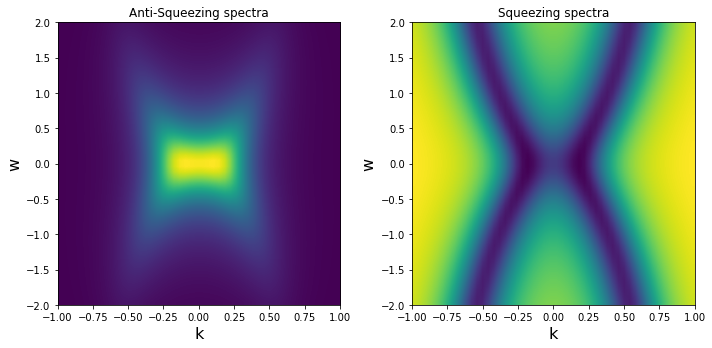

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))

ax1.imshow(delx_vec1, cmap ='viridis', extent =[k_vec.min(), k_vec.max(), w_vec.min(), w_vec.max()],interpolation ='bilinear')
ax1.set_ylabel("w", fontsize=16)
ax1.set_xlabel("k", fontsize=16)
ax1.set_title("Anti-Squeezing spectra")
ax1.set_aspect(0.5)

ax2.imshow(delx_vec2, cmap ='viridis', extent =[k_vec.min(), k_vec.max(), w_vec.min(), w_vec.max()],interpolation ='bilinear')
ax2.set_ylabel("w", fontsize=16)
ax2.set_xlabel("k", fontsize=16)
ax2.set_title("Squeezing spectra")
ax2.set_aspect(0.5)

fig.tight_layout()

## 5. Conclusion and Applications

In conclusion, we have shown that monolayer TMD's create reliable non-linear mirrors for the simple singularly polarised case, and on mixed polarisation can still reflect most light. Moreover, the exciton exciton interactions lead to interesting phenomena, like the detuning of the frequency for peak reflectivity, as well as fluctuation in quadrature, generating squeeze and anti squeeze states. 

<br> These squeeze and anti-squeeze states have many applications, a very commonly known one is in interferometers, namely at scientific collaborations like LIGO, for more accurate measurements and to overcome shot noice of the instruments.

## 6. Acknowledgements and Contributions

Aditya and Amal handled the theory part of the review going through multiple papers and resources to better understand the concepts and derivation. They were immensely supported by Aakash and Yuktee who provided valuable inputs and suggestions.<br>
Aakash and Yuktee handled the bulk of the simulation using the QuTip library in python to simulate the operators and Hamiltonians from scratch. Aditya and Amal were also involved in code review and debugging.<br>
This was a team project and we would like to acknowledge that this would not have been possible without the input of each member of the team.<br>
We would also like to thank Prof. Anshuman Kumar of IIT Bombay for providing a very interesting topic to work on and without whose classes and method of teaching we would not have this opportunity.


Aditya Ranjan  180260003 :     Theory and Derivations   <br>
Amal Mathew 180260005 :        Theory and Derivations  <br>
Aakash 180260001 :             Simulations and executable paper   <br>
Yuktee 180260044 :             Simulations and executable paper <br> 




## 7. References


1.   Atomically thin semiconductors as nonlinear mirrors,  *Sina Zeytinoglu, Charlaine Roth et all.*
2.    Collapses and revivals of exciton emission in a semiconductor
microcavity: detuning and phase-space filling effects, *Guang-Ri Jin, Wu-Ming Liu*
3. An Introduction to Second Quantization ,*Sandeep Pathak*
4. Theory of Excitons and Excitonic Quasimolecules Formed from Spatially Separated Electrons and Holes in Quasi - Zero - Dimensional Nanosystems, *Sergey Ivanovich Pokutnyi*
5. http://qutip.org/tutorials.html

## Appendix: Endsem Problem
Derive the dynamics of the system in the case of the inter-excitonic interactions in the mean field limit ( k=0, $\omega =0$) from the Hamiltonian given below:
$$H_{TMD}^{int} = [\sum_{k} \omega_{exc}(k) x_k^{\dagger}x_k ] + \frac{g}{2}x_0^{\dagger}x_0^{\dagger}x_0x_0 $$
Prove that the expectation of the k = 0 mode exciton operator is given by:
 $$<x_0> = -i(e^{-i\theta}\gamma\beta)\bar{G}(0,0)$$
Where <br>
\begin{align}
\bar{G}(w,k) &= \frac{1}{\gamma-i(\omega - \bar{\omega}(k))}\\   
\bar{\omega}(k)&= \omega_{exc}(k) + (2-\delta_{k,0})g|{\psi_0}|^2 \\ 
|\psi_0|^2 &= <x_0^{\dagger}x_0> \  is \ the  \ number \ of \ excitons \ for \ the \ mode \ of \ k=0\ , \ \omega=0 
\end{align}
Assume the expectation of the input operator to follow the relation
 $$<r_{k=0}^{in}(w=0)> = \beta\sqrt{\gamma}$$<br>
